# Математический анализ: примеры решения задач

In [32]:
from sympy import *
from scipy.optimize import minimize
import matplotlib.pyplot as plt

### Функции для раздела «Производная»

#### Функция tangent()

In [36]:
def tangent(y, x0):
    '''' Строит уравнение касательной
        к графику функции у(х) в точке
        с абсциссой х0 '''
    ''' (х0;у0) - точка касания '''
    y0 = y.subs(x, x0)

    ''' Касательная с уравнением у = kx+b
        проходит через точку М(х0;у0), а также
        через точку N(x0+l;y0+k) (к -
        угловой коэффициент)'''
    x1 = x0 + 1
    
    ''' Производная функции у при х=х0 '''
    k = diff(y,x).subs(x,x0)
    y1 = y0 + k

    ''' Касательная - это прямая, проходящая
    через точки М и N'''
    return Line((x0,y0), (x1,y1))

#### Функция critical_points_conditional()

In [37]:
def critical_points_conditional(f, g):
    ''' Нахождение критических точек
    функции Лагранжа L
    и определителя Delta
    f - целевая функция, g - условие '''
    
    ''' Функция Лагранжа '''
    lam = symbols('lam')
    L = f + lam*g
    
    ''' Производные 1-го порядка '''
    gradL = [diff(L,c) for c in [x,y]]
    
    ''' Производная no lam совпадает eg '''
    ''' Набор производных '''
    eqs = gradL + [g]
    
    ''' Ищем критические точки, приравнивая производные к нулю '''
    cr_point = solve(eqs, [x, y, lam], dict=True)
    
    ''' Производные функции g '''
    g_x = diff(g,x)
    g_y = diff(g,y)
    
    ''' Производные 2-го порядка '''
    L_xx = diff(L,x,2)
    L_xy = diff(L,x,y)
    L_yy = diff(L,y,2)
    
    ''' Определитель D '''
    M = Matrix([[0,g_x,g_y], [g_x,L_xx, L_xy], [g_y,L_xy,L_yy]])
    D = -det(M)
    
    return cr_point, D

#### Функция critical_points()

In [45]:
def critical_points(z):
    ''' Нахождение критических точек
    функции двух переменных z
    и величин А и Delta '''
    ''' Производные 1-го порядка '''
    z_x = diff(z,x)
    z_y = diff(z,y)
    
    ''' Ищем критические точки,
    приравнивая производные к нулю '''
    cr_point = solve([z_x, z_y], [x, y], dict=True)
    
    ''' Производные 2-го порядка '''
    A = diff(z,x,2)
    B = diff(z,x,y)
    C = diff(z,y,2)
    
    ''' Delta '''
    D = A*C - B**2
    
    return cr_point, A, D#### Функция suff_indic()

#### Функция suff_indic()

In [46]:
def suff_indic(A, D, cr_point):
    ''' А и D - функции двух переменных, cr_point - словарь '''
    A0 = A.subs(cr_point)
    D0 = D.subs(cr_point)
    return D0, A0

### 1: Вычислить $y'$ для функции $x\cos(\ln(x))+\sin(\ln(x)))$

In [9]:
x = symbols('х')
y = x*(cos(log(x))+sin(log(x)))
diff(y,x)

х*(-sin(log(х))/х + cos(log(х))/х) + sin(log(х)) + cos(log(х))

In [79]:
diff(y,x).simplify()

2*cos(log(х))

### 5: Решить уравнение $y'(x) = 0$, где $y(x) = max\{x^2-2x+3; 2x^2-5x-1\}$

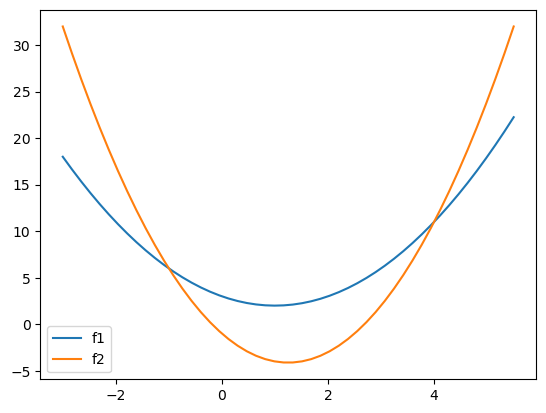

In [10]:
f1 = lambda х: х**2-2*х+3
f2 = lambda х: 2*х**2-5*х-1
x = np.linspace(-3, 5.5, 50)
y1 = f1(x)
plt.plot(x,y1, label = "f1")
y2 = f2(x)
plt.plot(x,y2, label = "f2")
plt.legend()
plt.show()

In [81]:
f1(-1) == f2(-1)

True

In [7]:
f1(-1) == f2(-1)

True

In [8]:
x = symbols('x')
f1 = x**2-2*x+3
f2 = 2*x**2-5*x-1

y_diff1 = diff(f2,x)
y_diff1

4*x - 5

In [ ]:
y_diff2 = diff(f1,x)
y_diff2

### 7: Показать, что функция $y = xsinx$ удовлетворяет уравнению $\frac{y'}{cosx} - x = tgx$

In [12]:
x, y = symbols('х у')
y = x*sin(x)
yprim = diff(y, x)
f = yprim/cos(x) - x
f.simplify()

tan(х)

Оно совпадает с функцией $ tg x$.

### 13: Написать уравнения касательных к графику функции $y=(x^2+1)(x-2)$ в точках её пересечения с осями координат.

Решение. В данной задаче для поиска точек пересечения с осями координат придется решать уравнение у = 0. При этом, среди корней, возвращаемых функцией solve(), могут быть комплексные. Для нашей задачи такие корни являются посторонними. Чтобы функция не выдавала комплексные корни, объявим символьную переменную действительного типа (параметр: real = True).

In [14]:
x = symbols('x', real=True)
y = (x**2 + 1)*(x - 2)

In [19]:
''' 1. Точка пересечения с осью ординат (х = 0) '''
tangent(y, 0).equation()

-x + y + 2

In [21]:
''' 2. Точка пересечения с осью абсцисс, решаем уравнение: у - 0 '''
хр = solve(y, x)
tangent(y, хр[0]).equation()

-5*x + y + 10

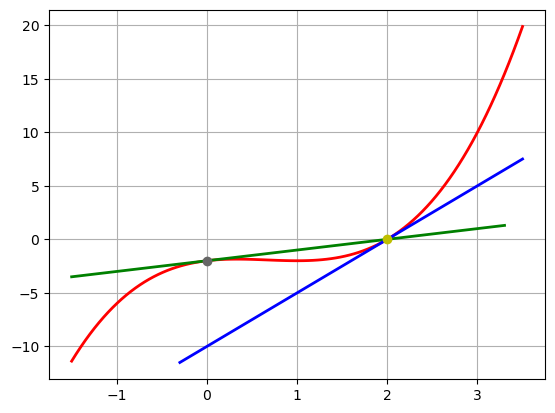

In [22]:
x = np.linspace(-1.5,3.5,100)
y = (x**2 + 1)*(x - 2)
plt.plot(x, y, lw=2, color='red')
x = np.linspace(-1.5,3.3,100)
y1 = x - 2
plt.plot(x, y1, lw=2, color='green')

x = np.linspace(-0.3,3.5,100)
y2 = 5*x - 10
plt.plot(x, y2, lw=2, color='blue')
plt.plot([0], [-2], 'o', color='0.4')
plt.plot([2], [0], 'o', color='y')
plt.grid(True)
plt.show()

### 15: Составить уравнение касательной и нормали к кривой в точке. $M(1;-1)$. $x^{2}+2xy^{2}+3y^{4}=6$

In [56]:
x, y = symbols('x y')
f = x**2 +2*x*y**2 + 3*y**4 - 6

''' Точка касания '''
x0, y0 = 1, -1

''' Производная неявной функции в точке (х0;у0)'''
k = idiff(f,y,x).subs([(x,1),(y,-1)])
x1 = x0 + 1
y1 = y0 + k

''' Касательная '''
l = Line((x0,y0), (x1,y1))
l.equation()

-x/4 + y + 5/4

In [58]:
''' Нормаль '''
p = Point(x0,y0)
l.perpendicular_line(p).equation()

-x - y/4 + 3/4

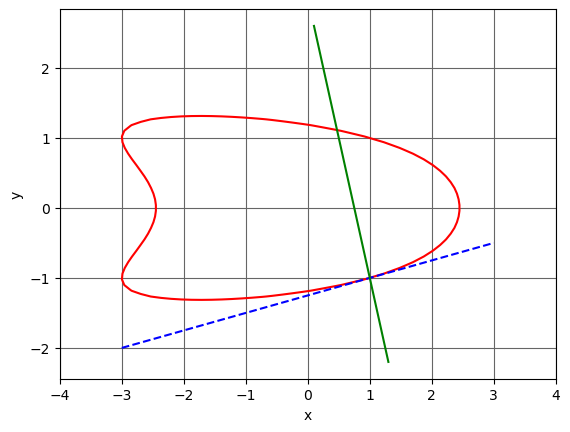

In [62]:
x = np.linspace(-4, 4, 50)
y = np.linspace(-2, 2, 50)

x, y = np.meshgrid(x, y)
f = x**2 + 2*x*y**2 + 3*y**4 - 6
plt.contour(x, y, f, 0, colors='r')
x = np.linspace(-3,3,50)
y2 = x/4 - 5/4

plt.plot(x,y2,'--',c='b')
x = np.linspace(0.1,1.3,50)
y3 = 3 - 4*x

plt.plot(x, y3, c='g')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, linestyle='-', color='0.4')

### 21: При каком значении параметра $a$ парабола $y = ax^2$ касается кривой $y = lnx$?

In [24]:
x, a, x0 = symbols('x а х0')

y1 = a*x**2
y2 = log(x)

y1_diff = diff(y1,x).subs(x,x0)
y2_diff = diff(y2,x).subs(x,x0)

y1_0 = y1.subs(x,x0)
y2_0 = y2.subs(x,x0)

solve([y1_0-y2_0, y1_diff-y2_diff], [x0, a])

[(exp(1/2), exp(-1)/2)]

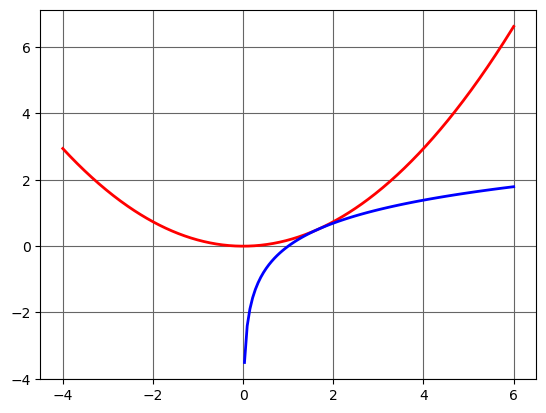

In [26]:
x = np.linspace(-4, 6, 500)
y = x**2/(2*np.exp(1))
plt.plot(x, y, lw=2, c='r')
x = np.linspace(0.03, 6, 100)
y = np.log(x)
plt.plot(x, y, lw=2, c='b')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

Ответ: $a = \frac{1}{2e}$

### 23: Исследовать на экстремум функцию $y = \sqrt[3]{x} \times lnx$.

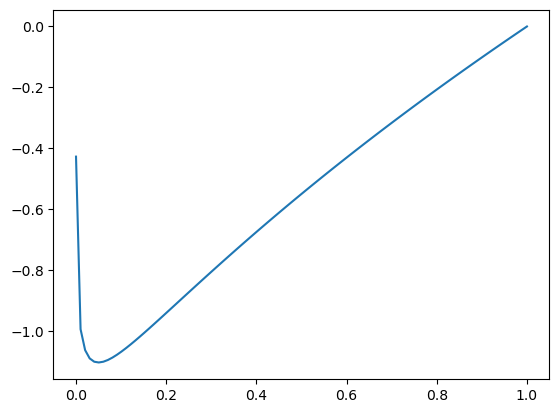

In [28]:
f = lambda x: (x**(1/3))*np.log(x)

x = np.linspace(0.0001,1,100)
y = f(x)
plt.plot(x, y)
plt.show()

In [33]:
res = minimize(f, 0.01)
print('xmin: %.4f y(x_min): %.3f' % (res.x, f(res.x)))

xmin: 0.0498 y(x_min): -1.104


In [34]:
res = minimize(f, 0.01)
print('xmin: %.4f y(x_min): %.3f' % (res.x, f(res.x)))

xmin: 0.0498 y(x_min): -1.104


### 31: Найти производную функции $w = \frac{x^2}{2} + \frac{y^2}{9} - z^2$ в точке $A(1;2)$ по направлению радиус-вектора этой точки.

In [35]:
l = Point(2,3,1)

l_n = l.distance(Point(0,0,0))

cos_a = l.x/l_n
cos_b = l.y/l_n
cos_c = l.z/l_n

x,y,z = symbols('x у z')
w = x**2/2 + y**2/9 - z**2

w_x = diff(w,x).subs({x:2, y:3, z:1})
w_y = diff(w,y).subs({x:2, y:3, z:1})
w_z = diff(w,z).subs({x:2, y:3, z:1})

w_x = diff(w,x).subs([(x,2),(y,3),(z,1)])
w_y = diff(w,y).subs([(x,2),(y,3),(z,1)])
w_z = diff(w,z).subs([(x,2),(y,3),(z,1)])

w_l = w_x*cos_a + w_y*cos_b + w_z*cos_c
w_l

2*sqrt(14)/7

### 40: Найти экстремумы функции $z = x^2 -4xy - 2y^2 + 8x$.

In [47]:
x, y = symbols('x y')
z = x**2 - 4*x*y - 2*y**2 + 8*x
cr_point, A, D = critical_points(z)
cr_point

[{x: -4/3, y: 4/3}]

Одна критическая точка

In [48]:
D0, A0 = suff_indic(A, D, cr_point[0])
D0, A0

(-24, 2)

$\Delta = -24 < 0$ - экстремума нет

### 47: Функция спроса $D$ и предложения $S$ от цены $p$ имеют вид: $D(p) = 40 - 1,3p$, $S(p) = 20 + 1,2p$. Найти эластичность спроса в точке равновенсой цены.

In [50]:
p = symbols('р')
D = 40 - 1.3*p
S = 20 + 1.2*p
p0 = solve(D-S,p)
p0[0].n(2)

8.0

In [51]:
Dprim = diff(D,p)
E = (p*Dprim/D).subs(p,p0[0])
E.n(3)

-0.351